<a href="https://colab.research.google.com/github/rhynero/eeml_cw/blob/main/04_ML_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


---

Despite of the efficiency of the perceptron algorithm in binary classification tasks; however, the algorithm never converges when the data are not linearly seperable. Logistic regression is a supervised ML algorithm that is used in binary classification problems. The algorithm converts the linear model predictions into a probability between 0 and 1. For better understanding of this algorithm, let us recall the odds ratio, which is the odds in favour of a particular event to occur. The odds ratio can be formulated as $\frac{p}{1-p}$, where $p$ is the probability of a positive event (the event that we want to predict e.g. $y = 1$). Let us now extend our previous discussion and define the logit function, which is simply the logarithm of the odds ratio (log-odds) given by the following equation:

\begin{equation}
logit(p) = \log \left(\frac{p}{1-p}\right)
\end{equation}

As $p$ is a probability, the logit function takes a value between 0 and 1 and transforms them to values over the entire real number range, which we can use to express a linear relationship between feature values and the log-odds.

\begin{equation}
logit\left(p\left(y=1|\mathbf{x}\right)\right)=w_0x_0 + w_1x_1 + \ldots + w_nx_n = \sum_{i=0}^{n} w_nx_n
\end{equation}

Hence, $p\left(y=1|\mathbf{x}\right)$ is the probability of a sample point that belongs to class 1 given its features $x$. However, in the learning process, we are more interested in the opposite case such that predicting the probability that a certain sample belongs to a particular class, which is simply the inverse of the logit function. The inverse of the logit function is called the $logistic$ function (also know as $Sigmoid$ function). The Sigmoid function is given by the equation below:

\begin{equation}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

Hence, $z$ is the net input, that is, the linear combination of weights and sample features such that $z = \sum_{i=0}^{n} w_nx_n$. The Sigmoid function can be further visualised and plotted using the figure below:

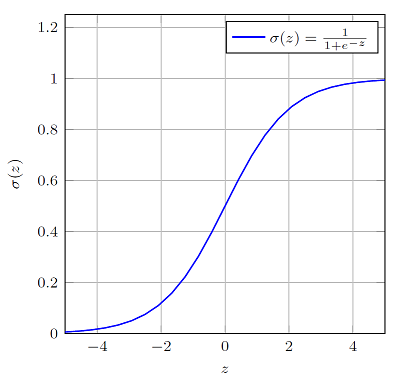

From the figure above we can observe that the Sigmoid function is bouned between 0 and 1. Such that if $z$ goes toward infinity ($z \to \infty$) then $\sigma(z)=\frac{1}{1+e^{-\infty}}=1$, and on the other hand when $z$ goes toward minus infinity ($z \to -\infty$) then $\sigma(z)=\frac{1}{1+e^{\infty}}=0$. Thus, we conclude that sigmoid function takes real number values as input and transforms them to values in the range [0,1] with $\sigma(0) = 0.5$.

In logistic regression, the activation function simply becomes the sigmoid function that we defined earlier, which is illustrated in the following figure:

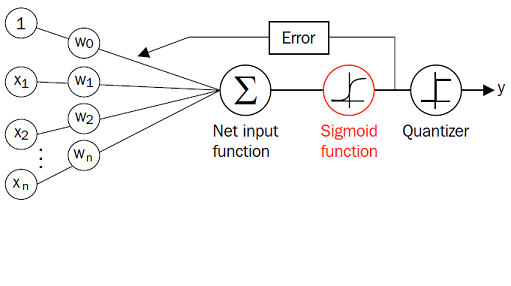

The output of the Sigmoid activation function is interpreted as the probability of particular sample belonging to class 1 $\sigma(z)=p\left(y=1|\mathbf{x,w}\right)$ given set of features $x$ and set of weights $w$. For instance, assume we have a binary classifier to classify samples of Iris-Versicolor ($y=1$) vs. Iris-Setosa ($y=0$). Then if we compute $\sigma(z)=0.9$, it means that the chance that this sample is an Iris-Versicolor flower is $90\%$. Similarly, the probability that this flower is an Iris-Setosa flower can be calculated as $p\left(y=0|\mathbf{x,w}\right) = 1 - p\left(y=1|\mathbf{x,w}\right) = 0.1$ or $10\%$.


So far we have discussed how Logistic regression makes predictions, but we did not talk about the cost function and learning process. Unlike the case in linear regression where we used MSE cost function, in logistic regression we use log-loss (also known as binary cross entropy (BCE)), given by the equation below:

\begin{equation}
    J(w)=\frac{1}{N} \sum_{i=1}^{N} [-y_{i}\cdot\log\left(\hat{y}_{i}\right)-\left(1-y_{i}\right)\cdot\log\left(1-\hat{y}_{i}\right)]
\end{equation}
where $y_{i}$ is the label  for training example $i$, $\hat{y}_{i}$ is the predicted class by applying the hypothesis or $\sigma(z)$.


For more information why we chose BCE over MSE, please refer to the lecture notes

Our main aim is to minimise our BCE cost function in order to get accurate predictions. In order to do that, we keep updating the parameter $w$ in the direction that minimises the cost function. The amount of change that we modify $w$ is called the gradient and is given by differentiating the cost function with respect to $w$. We can control how fast this gradient step is moving by introducing the learning rate ($\alpha$). This process is called Gradient Descent and is illustrated in the figure below:

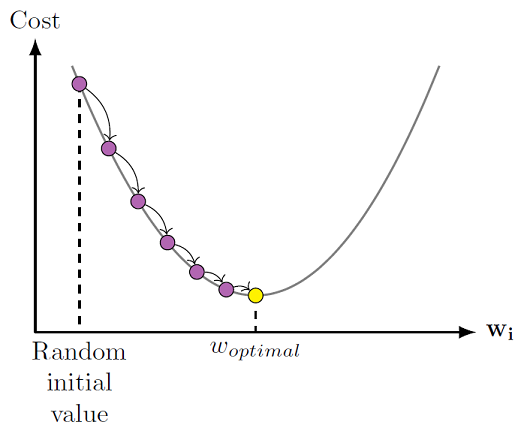


When the training is done and we want to predict the output using test data, the predicted probability can be converted into a binary outcome via a quantizer (unit step function) such that:

\begin{equation}
y_{pred} = \begin{cases}
      1 & \hat{y}\geq 0.5 \\
      0 & otherwise
   \end{cases}
\end{equation}


Reference:
"Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015


# Data Used & Problem Definition

We will use logistic regression as a binary classifier between Setosa vs other classes (verginica and versicolor grouped together). Here we say that data points with features that result in output probabilities closer to 0 are likely Setosa, while values closer to 1 are likely not Setosa. For simplicity, we will consider two features, petal length and sepal length, which can be visualised in a 2D plot.

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

In [177]:
iris = datasets.load_iris()

In [178]:
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

In [179]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [180]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

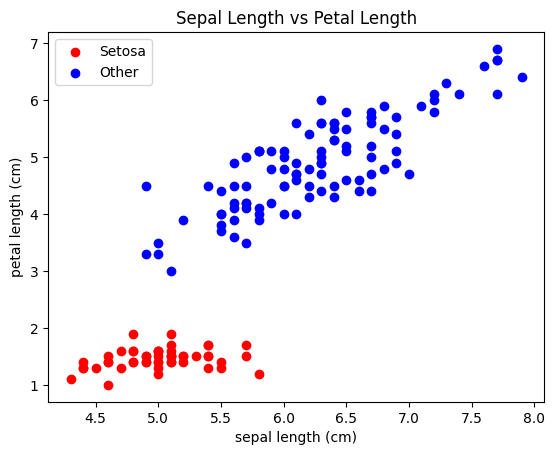

In [181]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row)
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Plot features in 2D plot - sepal length (x-axis) vs petal length (y-axis)
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'
X_target = iris_data[iris_data.target==0]
X_other = iris_data[iris_data.target!=0]

plt.scatter(X_target[feat1],X_target[feat2],color='red',marker='o',label="Setosa")
plt.scatter(X_other[feat1],X_other[feat2],color='blue',marker='o',label='Other')
plt.title("Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

In [182]:
def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

In [183]:
def cost(Y, y):
    # log-loss or Binary Cross Entropy (BCE)
    eps = 1e-15 # to avoid numerical error at log(0)
    return (-y * np.log(Y+eps) - (1 - y) * np.log(1 - Y + eps)).mean()

In [184]:
def plot_cost(loss):
    # Function for plotting the cost vs iterations.
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    # plt.savefig('plot.pdf')
    plt.show()

In [185]:
def predict(X, W):
    # Function for predicting on test data (see Task 1)
    prediction = sigmoid(np.dot(X, W))
    return prediction.round()

In [186]:
def fit(alpha, num_iter, X, y):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        if i % 100 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list)
    # This function will return the final weights as an array
    return W

iteration: 1 	 cost: 0.6931471805599433 	 weights: [0.00166667 0.01253    0.01391667] 	
iteration: 101 	 cost: 0.39716904888478627 	 weights: [-0.05071148 -0.07762237  0.42536019] 	
iteration: 201 	 cost: 0.29984517309777964 	 weights: [-0.10551432 -0.23097319  0.68989714] 	
iteration: 301 	 cost: 0.2382094249373507 	 weights: [-0.14864573 -0.34969591  0.90262115] 	
iteration: 401 	 cost: 0.196815362215292 	 weights: [-0.18374873 -0.44513976  1.07818086] 	
iteration: 501 	 cost: 0.1674853678274873 	 weights: [-0.21316007 -0.52436457  1.22669262] 	
iteration: 601 	 cost: 0.14576052746256243 	 weights: [-0.23838792 -0.5918273   1.3549739 ] 	
iteration: 701 	 cost: 0.12908024748143987 	 weights: [-0.26043675 -0.65044743  1.46769223] 	
iteration: 801 	 cost: 0.11589461609963037 	 weights: [-0.27999968 -0.70221333  1.56813002] 	
iteration: 901 	 cost: 0.1052199140543055 	 weights: [-0.29757115 -0.74852835  1.65866121] 	
iteration: 1001 	 cost: 0.0964055186179073 	 weights: [-0.31351439 -0.7

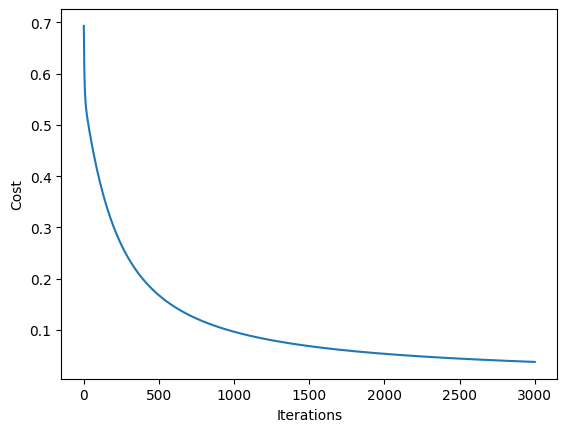

In [187]:
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X,y)

In [188]:
predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

# Evaluation Metrics

Evaluation metrics are used to measure the performance of machine learning models. It is very important to evaluate the model after training takes place to decide whether the model can be implemented in the project or not. There are a variety of techniques used for evaluation such as classification accuracy, loss and confusion matrix. Confusion matrix is very useful tool for evaluation. It visualises the predictions for a classification problem against the real labels in table format.  Each row of the matrix represents the instances of real labels while each column represents the instances of predicted labels. The values of the confusion matrix are denoted by four categories, namely, true positive (TP), true negative (TN), false negative (FN) and false positive (FP). The outcomes of a confusion matrix can be visualised in Figure


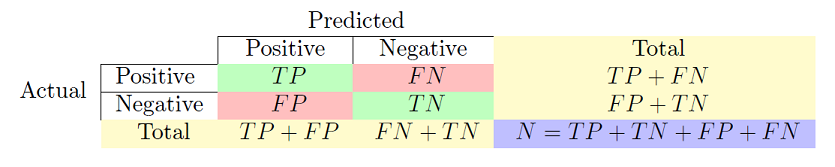

In [189]:
def compute_confusion_matrix(true, pred):

    num_cls = len(np.unique(true)) # Number of classes
    result = np.zeros((num_cls, num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Confusion matrix result: 
[[ 50.   0.]
 [  0. 100.]]
accuracy = 100.00%


## Task 1 [40 marks]

In the provided code, the network's performance was assessed using the same training dataset for both training and evaluation, which is not a recommended practice in evaluating machine learning algorithms. Your task is to adjust the code to split the data into two separate sets: a training set and a testing set. The training set should account for 80% of the original data, while the remaining 20% will constitute the test data. Additionally, as part of your report, you should address the following points:

1. **Importance of Having Two Datasets**: In your report, discuss the significance of using two distinct datasets (training and testing) when evaluating a machine learning algorithm.

2. **Code for Data Splitting**: Provide the code you used to divide the original dataset into the training and testing datasets. Ensure that the split is random and maintains data integrity.

3. **Confusion Matrix and Accuracy**: After modifying the code and training the model on the training dataset, calculate the confusion matrix and total accuracy of the algorithm using the testing dataset. Include these performance metrics in your report to assess the model's effectiveness in classifying data.

Please ensure that your code is well-documented and your report provides clear explanations of the concepts discussed.


It is important to have two separate datasets for training and testing as you can use the testing set to measure how well your model generalises on unseen data, helping to minimise bias and overfitting. This way we can confirm that the model is learning the patterns underneath the data.

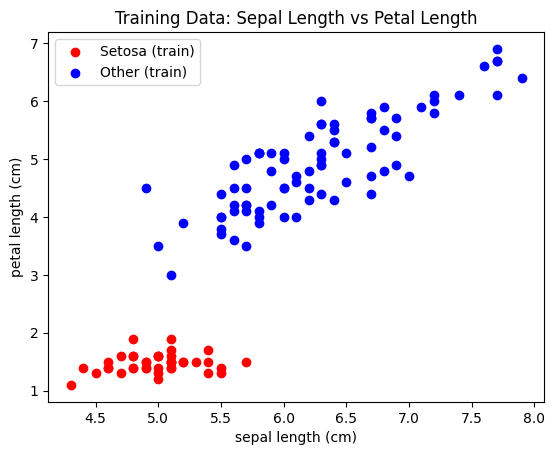

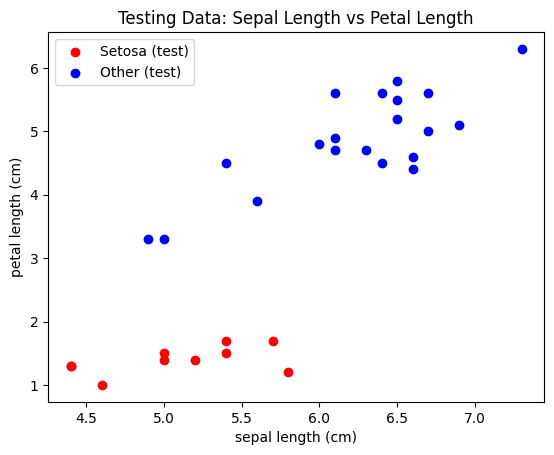

Number of elements in training data: 120
Number of elements in testing data: 30


In [190]:
from sklearn.model_selection import train_test_split

# Original features and labels
X = iris_data.drop("target", axis=1)
y = iris_data["target"]

#can use this to generate random seeds
rand_seed = np.random.randint(100)

# Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert to binary labels (Setosa = 0, Others = 1)
y_train = np.where(y_train_full == 0, 0, 1)
y_test  = np.where(y_test_full == 0, 0, 1)

# Select only sepal length (0) and petal length (2) from training data
X_train = X_train_full.iloc[:, [0, 2]]

# Add bias term
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train.values), axis=1)
# Convert back to dataframe
X_train = pd.DataFrame(X_train, columns=['bias', 'sepal length (cm)', 'petal length (cm)'])


# --- PLOT TRAINING DATA ONLY ---
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'

# Separate points based on binary label
X_train_setosa = X_train[y_train == 0]
X_train_other  = X_train[y_train == 1]

plt.scatter(X_train_setosa[feat1], X_train_setosa[feat2],
            color='red', marker='o', label="Setosa (train)")
plt.scatter(X_train_other[feat1], X_train_other[feat2],
            color='blue', marker='o', label="Other (train)")

plt.title("Training Data: Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

# Same for Testing data:
# Select only sepal length (0) and petal length (2) from training data
X_test = X_test_full.iloc[:, [0, 2]]

# Add bias term
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test.values), axis=1)
# Convert back to dataframe
X_test = pd.DataFrame(X_test, columns=['bias', 'sepal length (cm)', 'petal length (cm)'])

# --- PLOT TRAINING DATA ONLY ---

# Separate points based on binary label
X_test_setosa = X_test[y_test == 0]
X_test_other  = X_test[y_test == 1]

plt.scatter(X_test_setosa[feat1], X_test_setosa[feat2],
            color='red', marker='o', label="Setosa (test)")
plt.scatter(X_test_other[feat1], X_test_other[feat2],
            color='blue', marker='o', label="Other (test)")

plt.title("Testing Data: Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

print(f"Number of elements in training data: {X_train.shape[0]}\nNumber of elements in testing data: {X_test.shape[0]}" )

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00166667 0.01259167 0.013925  ] 	
iteration: 101 	 cost: 0.39953267136174736 	 weights: [-0.0513575  -0.07580532  0.42210172] 	
iteration: 201 	 cost: 0.30306843635580416 	 weights: [-0.10697437 -0.22883991  0.68508161] 	
iteration: 301 	 cost: 0.24149947735261412 	 weights: [-0.15091892 -0.34779701  0.89737455] 	
iteration: 401 	 cost: 0.19993356546774851 	 weights: [-0.18678056 -0.44366602  1.07304708] 	
iteration: 501 	 cost: 0.17037890919091545 	 weights: [-0.21688675 -0.52336507  1.22192416] 	
iteration: 601 	 cost: 0.1484351025014357 	 weights: [-0.24275038 -0.5912976   1.35068351] 	
iteration: 701 	 cost: 0.13155782361362062 	 weights: [-0.26538371 -0.65036396  1.46392487] 	
iteration: 801 	 cost: 0.11819953460067655 	 weights: [-0.28548738 -0.70254689  1.56489708] 	
iteration: 901 	 cost: 0.10737455614282523 	 weights: [-0.30356227 -0.74924954  1.6559573 ] 	
iteration: 1001 	 cost: 0.0984292476224763 	 weights: [-0.31997688 

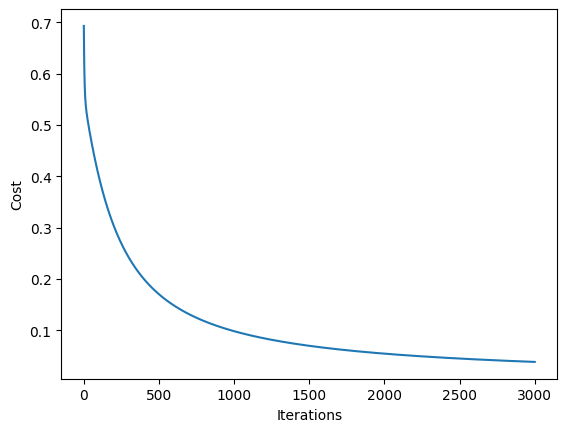

In [191]:
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X_train,y_train)


In [192]:
predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

Confusion matrix result: 
[[10.  0.]
 [ 0. 20.]]
accuracy = 100.00%


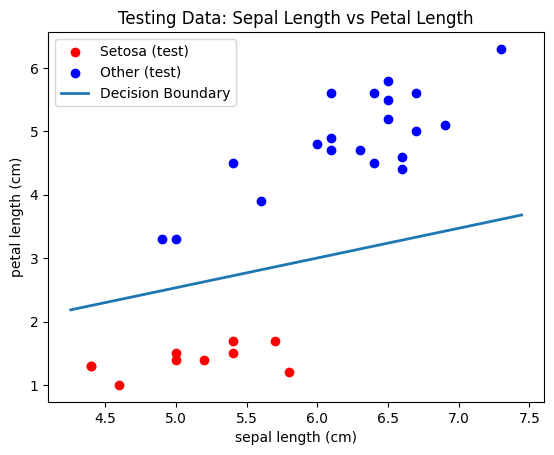

In [193]:
conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

# Plot again with decision boundary
plt.scatter(X_test_setosa[feat1], X_test_setosa[feat2],
            color='red', marker='o', label="Setosa (test)")
plt.scatter(X_test_other[feat1], X_test_other[feat2],
            color='blue', marker='o', label="Other (test)")

# --- Decision boundary line ---
xmin, xmax = plt.xlim()   # use plot range for a clean line
x_vals = np.linspace(xmin, xmax, 200)

W0, W1, W2 = model_weights[0], model_weights[1], model_weights[2]

# Solve for x2:  W0 + W1*x1 + W2*x2 = 0
y_vals = -(W0 + W1 * x_vals) / W2

plt.plot(x_vals, y_vals, linewidth=2, label="Decision Boundary")

plt.title("Testing Data: Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

## Task 2 [20 marks]

In the provided code, the primary objective was to classify Iris-Setosa versus other classes. Your task is to modify the code so that it can classify Iris-Versicolor versus other classes and Iris-Virginica versus other classes separately. For each case, you should divide the dataset into training and testing subsets. Additionally, your report should cover the following aspects:

1. **Dataset Adjustment Code**: Provide the code you used to adjust the dataset for each classification scenario, ensuring that you have separate training and testing data for Iris-Versicolor versus other classes and Iris-Virginica versus other classes.

2. **Reporting Weights**: Present the final weights obtained for each classification case.

3. **Performance Comparison**: Compare the performance of the network for each classification case. Discuss any differences in performance and provide justifications for why the performance may vary between the two cases. Consider factors such as dataset characteristics and class separability.

Ensure that your code modifications are clearly documented, and your report provides insightful explanations for the observed differences in classification performance.


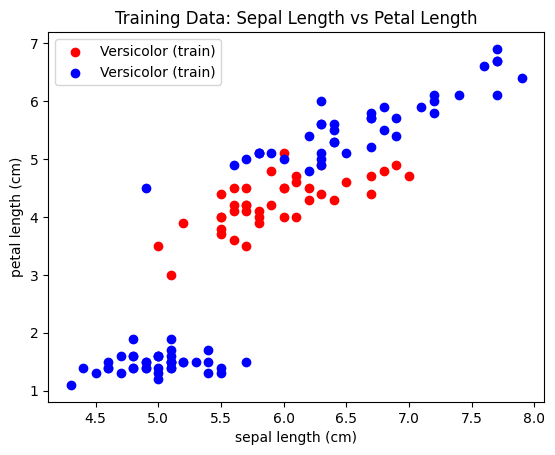

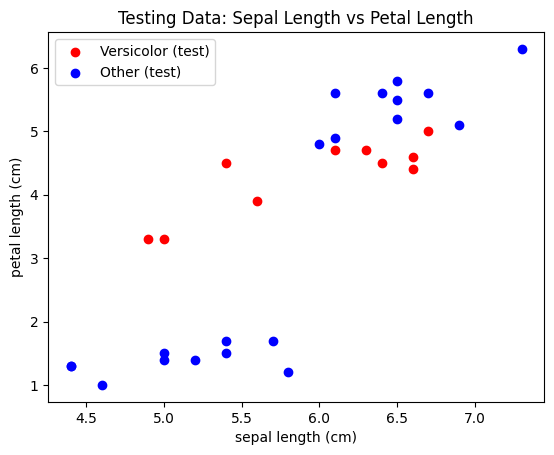

Number of elements in training data: 120
Number of elements in testing data: 30
Seed number: 42

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00166667 0.00944167 0.004675  ] 	
iteration: 101 	 cost: 0.6315031938055197 	 weights: [ 0.03149396  0.14208421 -0.06400357] 	
iteration: 201 	 cost: 0.6210825570337436 	 weights: [ 0.04536647  0.1979774  -0.14768001] 	
iteration: 301 	 cost: 0.6148930452312079 	 weights: [ 0.05484606  0.24156783 -0.21204382] 	
iteration: 401 	 cost: 0.6111347122335142 	 weights: [ 0.06104165  0.27592399 -0.26211624] 	
iteration: 501 	 cost: 0.6088064688678503 	 weights: [ 0.06475199  0.30326616 -0.30146064] 	
iteration: 601 	 cost: 0.6073378526158645 	 weights: [ 0.06655905  0.32521851 -0.33263989] 	
iteration: 701 	 cost: 0.6063957775418468 	 weights: [ 0.066893    0.34298549 -0.35752778] 	
iteration: 801 	 cost: 0.6057813926674583 	 weights: [ 0.06607644  0.3574729  -0.37751679] 	
iteration: 901 	 cost: 0.6053736651237923 	 weights: [ 0.06435459  0.36

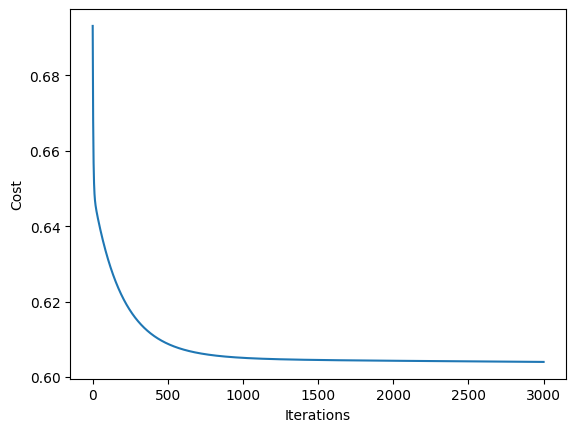

Confusion matrix result: 
[[ 0. 10.]
 [ 0. 20.]]
accuracy = 66.67%


In [194]:
from sklearn.model_selection import train_test_split

# Original features and labels
X = iris_data.drop("target", axis=1)
y = iris_data["target"]

#can use this to generate random seeds
rand_seed = np.random.randint(100)

# Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=rand_seed, stratify=y
)

# Convert to binary labels (Versicolor = 0, Others = 1)
y_train = np.where(y_train_full == 1, 0, 1)
y_test  = np.where(y_test_full == 1, 0, 1)

# Select only sepal length (0) and petal length (2) from training data
X_train = X_train_full.iloc[:, [0, 2]]

# Add bias term
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train.values), axis=1)
# Convert back to dataframe
X_train = pd.DataFrame(X_train, columns=['bias', 'sepal length (cm)', 'petal length (cm)'])


# --- PLOT TRAINING DATA ONLY ---
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'

# Separate points based on binary label
X_train_versicolor = X_train[y_train == 0]
X_train_other  = X_train[y_train == 1]

plt.scatter(X_train_versicolor[feat1], X_train_versicolor[feat2],
            color='red', marker='o', label="Versicolor (train)")
plt.scatter(X_train_other[feat1], X_train_other[feat2],
            color='blue', marker='o', label="Versicolor (train)")

plt.title("Training Data: Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

# Same for Testing data:
# Select only sepal length (0) and petal length (2) from training data
X_test = X_test_full.iloc[:, [0, 2]]

# Add bias term
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test.values), axis=1)
# Convert back to dataframe
X_test = pd.DataFrame(X_test, columns=['bias', 'sepal length (cm)', 'petal length (cm)'])

# --- PLOT TRAINING DATA ONLY ---

# Separate points based on binary label
X_test_versicolor = X_test[y_test == 0]
X_test_other  = X_test[y_test == 1]

plt.scatter(X_test_versicolor[feat1], X_test_versicolor[feat2],
            color='red', marker='o', label="Versicolor (test)")
plt.scatter(X_test_other[feat1], X_test_other[feat2],
            color='blue', marker='o', label="Other (test)")

plt.title("Testing Data: Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

print(f"Number of elements in training data: {X_train.shape[0]}\nNumber of elements in testing data: {X_test.shape[0]}" )
print(f"Seed number: {rand_seed}\n")
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X_train,y_train)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

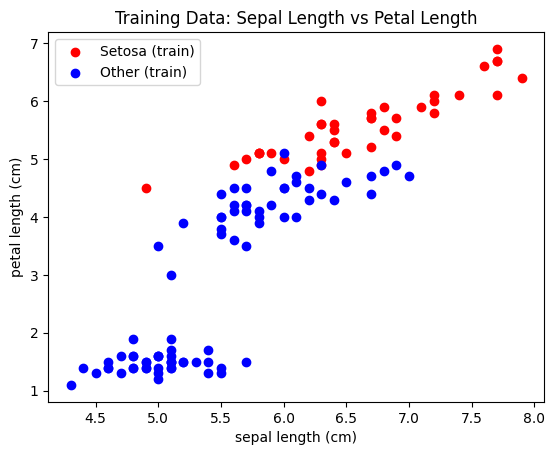

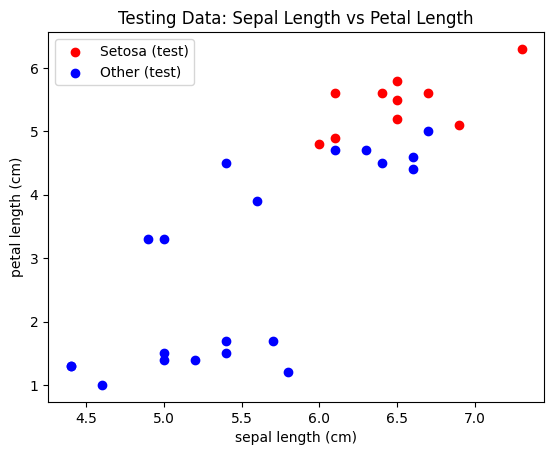

Number of elements in training data: 120
Number of elements in testing data: 30
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00166667 0.007175   0.00025   ] 	
iteration: 101 	 cost: 0.5586118460838423 	 weights: [ 0.08014064  0.22530661 -0.25744743] 	
iteration: 201 	 cost: 0.4881924370220503 	 weights: [ 0.13800797  0.36826183 -0.47200265] 	
iteration: 301 	 cost: 0.4431046172862818 	 weights: [ 0.18593957  0.48406204 -0.64256866] 	
iteration: 401 	 cost: 0.41190455252020286 	 weights: [ 0.22708446  0.58127465 -0.78366143] 	
iteration: 501 	 cost: 0.3889105854105151 	 weights: [ 0.26341573  0.66526857 -0.90421969] 	
iteration: 601 	 cost: 0.37110822228593465 	 weights: [ 0.29620167  0.73950238 -1.00988467] 	
iteration: 701 	 cost: 0.3567854114571047 	 weights: [ 0.32628713  0.80628587 -1.1043518 ] 	
iteration: 801 	 cost: 0.3449087926170164 	 weights: [ 0.35425528  0.86721734 -1.19013492] 	
iteration: 901 	 cost: 0.334821217030387 	 weights: [ 0.38052192  0.92343884 -1.269003

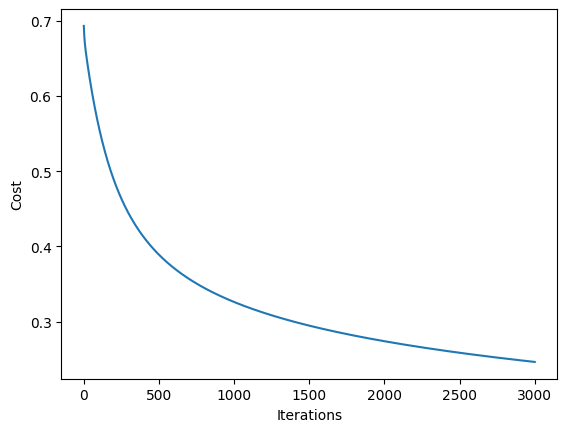

Confusion matrix result: 
[[ 9.  1.]
 [ 1. 19.]]
accuracy = 93.33%


In [195]:
from sklearn.model_selection import train_test_split

# Original features and labels
X = iris_data.drop("target", axis=1)
y = iris_data["target"]

#can use this to generate random seeds
#rand_seed = np.random.randint(100)

# Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=rand_seed, stratify=y
)

# Convert to binary labels (Virginica = 0, Others = 1)
y_train = np.where(y_train_full == 2, 0, 1)
y_test  = np.where(y_test_full == 2, 0, 1)

# Select only sepal length (0) and petal length (2) from training data
X_train = X_train_full.iloc[:, [0, 2]]

# Add bias term
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train.values), axis=1)
# Convert back to dataframe
X_train = pd.DataFrame(X_train, columns=['bias', 'sepal length (cm)', 'petal length (cm)'])


# --- PLOT TRAINING DATA ONLY ---
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'

# Separate points based on binary label
X_train_virginica = X_train[y_train == 0]
X_train_other  = X_train[y_train == 1]

plt.scatter(X_train_virginica[feat1], X_train_virginica[feat2],
            color='red', marker='o', label="Setosa (train)")
plt.scatter(X_train_other[feat1], X_train_other[feat2],
            color='blue', marker='o', label="Other (train)")

plt.title("Training Data: Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

# Same for Testing data:
# Select only sepal length (0) and petal length (2) from training data
X_test = X_test_full.iloc[:, [0, 2]]

# Add bias term
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test.values), axis=1)
# Convert back to dataframe
X_test = pd.DataFrame(X_test, columns=['bias', 'sepal length (cm)', 'petal length (cm)'])

# --- PLOT TRAINING DATA ONLY ---

# Separate points based on binary label
X_test_virginica = X_test[y_test == 0]
X_test_other  = X_test[y_test == 1]

plt.scatter(X_test_virginica[feat1], X_test_virginica[feat2],
            color='red', marker='o', label="Setosa (test)")
plt.scatter(X_test_other[feat1], X_test_other[feat2],
            color='blue', marker='o', label="Other (test)")

plt.title("Testing Data: Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

print(f"Number of elements in training data: {X_train.shape[0]}\nNumber of elements in testing data: {X_test.shape[0]}" )

alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X_train,y_train)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Both models perform worse than the Setosa-other model. This is because Setosa is more clearly separable compared to the other 2 classes, whereas Versicolor and Virginica classes are quite close together and dont form clear class boundaries. This leads to less than perfect accuracy values. This also means that given a different splitting of the training and test cases, both models vary in accuracy (and weight values) and one model may perform better than the other.

For seed number 73 the weights for versicolor and virginica respectively are:


*   [-0.05470957  0.4462363  -0.47299748]
*   [ 0.76622122  1.60206896 -2.22452155]

and accuracy results are:

*   66.67%
*   96.67%



## Task 3 [40 marks]

In this tutorial, you were introduced to the parameter $\alpha$, also known as the learning rate. A fixed value of $0.01$ was chosen for our algorithm. Your task is to investigate the effect of selecting different values of $\alpha$ for the Iris-Setosa vs. All classifier. In your report, please cover the following aspects:

1. **Variation of $\alpha$**: Experiment with different values of $\alpha$ (e.g., 0.0001, 0.1, 1, 100). Note that you may want to print the loss more frequently to observe the initial behavior of the algorithm when using different $\alpha$ values.

2. **Code Execution**: Run the code for each of the specified $\alpha$ values and record the performance of the network for each case.

3. **Visualisation**: Include a graphical representation of the cost versus epochs for each $\alpha$ value. Additionally, report the accuracy of the test data and provide confusion matrices for each $\alpha$ value.

4. **Discussion**: In your own words, explain why the performance of the algorithm changes when using different $\alpha$ values. Discuss the effect of the learning rate on the gradient descent process, considering aspects like convergence speed, stability, and the risk of overshooting.

Ensure that your code adjustments are well-documented, and your report provides clear insights into the impact of varying the learning rate on the performance of the Iris-Setosa vs. All classifier.


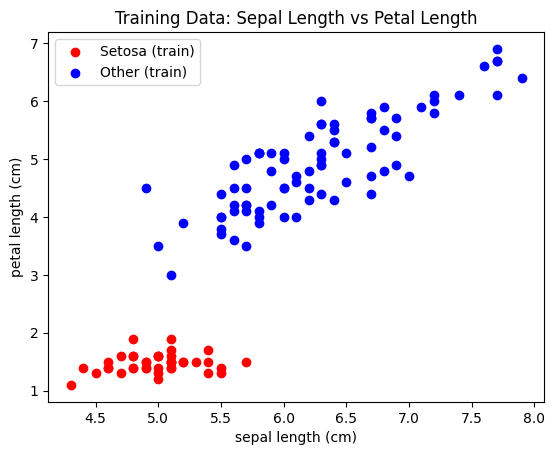

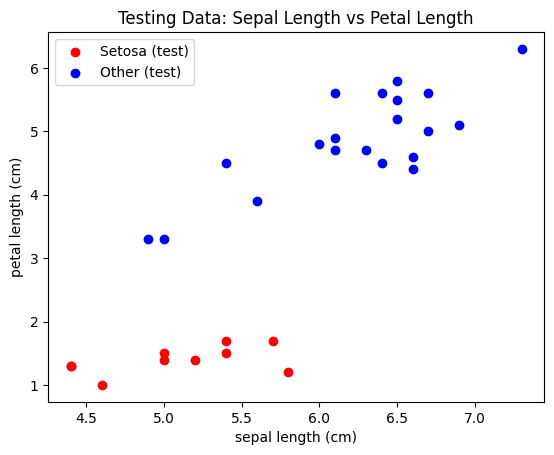

Number of elements in training data: 120
Number of elements in testing data: 30
Seed number: 71



In [196]:
from sklearn.model_selection import train_test_split

# Original features and labels
X = iris_data.drop("target", axis=1)
y = iris_data["target"]

#can use this to generate random seeds
rand_seed = np.random.randint(100)

# Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert to binary labels (Setosa = 0, Others = 1)
y_train = np.where(y_train_full == 0, 0, 1)
y_test  = np.where(y_test_full == 0, 0, 1)

# Select only sepal length (0) and petal length (2) from training data
X_train = X_train_full.iloc[:, [0, 2]]

# Add bias term
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train.values), axis=1)
# Convert back to dataframe
X_train = pd.DataFrame(X_train, columns=['bias', 'sepal length (cm)', 'petal length (cm)'])


# --- PLOT TRAINING DATA ONLY ---
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'

# Separate points based on binary label
X_train_setosa = X_train[y_train == 0]
X_train_other  = X_train[y_train == 1]

plt.scatter(X_train_setosa[feat1], X_train_setosa[feat2],
            color='red', marker='o', label="Setosa (train)")
plt.scatter(X_train_other[feat1], X_train_other[feat2],
            color='blue', marker='o', label="Other (train)")

plt.title("Training Data: Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

# Same for Testing data:
# Select only sepal length (0) and petal length (2) from training data
X_test = X_test_full.iloc[:, [0, 2]]

# Add bias term
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test.values), axis=1)
# Convert back to dataframe
X_test = pd.DataFrame(X_test, columns=['bias', 'sepal length (cm)', 'petal length (cm)'])

# --- PLOT TRAINING DATA ONLY ---

# Separate points based on binary label
X_test_setosa = X_test[y_test == 0]
X_test_other  = X_test[y_test == 1]

plt.scatter(X_test_setosa[feat1], X_test_setosa[feat2],
            color='red', marker='o', label="Setosa (test)")
plt.scatter(X_test_other[feat1], X_test_other[feat2],
            color='blue', marker='o', label="Other (test)")

plt.title("Testing Data: Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

print(f"Number of elements in training data: {X_train.shape[0]}\nNumber of elements in testing data: {X_test.shape[0]}" )
print(f"Seed number: {rand_seed}\n")

iteration: 1 	 cost: 0.6931471805599435 	 weights: [1.66666667e-05 1.25916667e-04 1.39250000e-04] 	
iteration: 101 	 cost: 0.6616196316177232 	 weights: [0.00152894 0.01178304 0.01340987] 	
iteration: 201 	 cost: 0.6368514073612679 	 weights: [0.00276197 0.02174957 0.02549599] 	
iteration: 301 	 cost: 0.61725125435805 	 weights: [0.00375235 0.03024708 0.03655218] 	
iteration: 401 	 cost: 0.60159789683858 	 weights: [0.00453245 0.03747168 0.0467156 ] 	
iteration: 501 	 cost: 0.5889637915324457 	 weights: [0.00513039 0.0435939  0.05610556] 	
iteration: 601 	 cost: 0.5786475590416018 	 weights: [0.00557039 0.04876044 0.0648247 ] 	
iteration: 701 	 cost: 0.5701190235747886 	 weights: [0.00587319 0.05309691 0.07296075] 	
iteration: 801 	 cost: 0.5629765249238043 	 weights: [0.00605652 0.0567106  0.08058856] 	
iteration: 901 	 cost: 0.5569145957048968 	 weights: [0.00613556 0.0596932  0.08777198] 	
iteration: 1001 	 cost: 0.5516998137800245 	 weights: [0.00612331 0.06212321 0.09456555] 	
ite

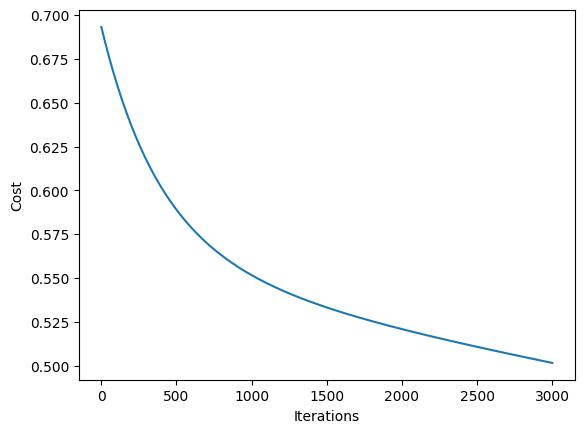

Confusion matrix result: 
[[ 0. 10.]
 [ 0. 20.]]
accuracy = 66.67%


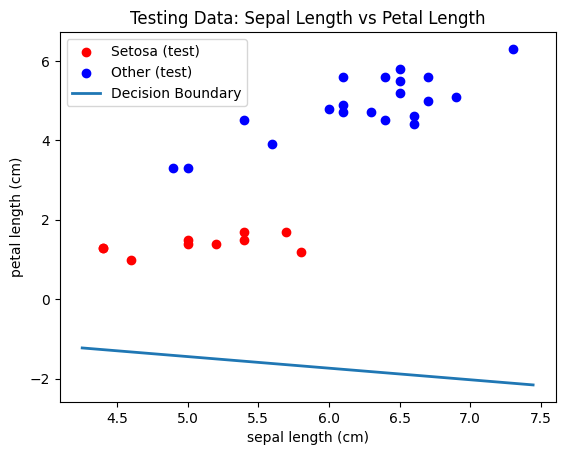

In [200]:
# Redefine fit to be able to print loss at different intervals

def fit(alpha, num_iter, X, y, interval):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        if i % interval == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list)
    # This function will return the final weights as an array
    return W


alpha = 0.0001
num_iter = 3000
model_weights = fit(alpha, num_iter, X_train,y_train, 100)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

def plot_boundary(X_test_target, X_test_other, model_weights):
  # Plot again with decision boundary
  plt.scatter(X_test_setosa[feat1], X_test_setosa[feat2],
              color='red', marker='o', label="Setosa (test)")
  plt.scatter(X_test_other[feat1], X_test_other[feat2],
              color='blue', marker='o', label="Other (test)")

  # --- Decision boundary line ---
  xmin, xmax = plt.xlim()   # use plot range for a clean line
  x_vals = np.linspace(xmin, xmax, 200)

  W0, W1, W2 = model_weights[0], model_weights[1], model_weights[2]

  # Solve for x2:  W0 + W1*x1 + W2*x2 = 0
  y_vals = -(W0 + W1 * x_vals) / W2

  plt.plot(x_vals, y_vals, linewidth=2, label="Decision Boundary")

  plt.title("Testing Data: Sepal Length vs Petal Length")
  plt.xlabel(feat1)
  plt.ylabel(feat2)
  plt.legend(loc='upper left')
  plt.show()

plot_boundary(X_test_setosa, X_test_other, model_weights)

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.01666667 0.12591667 0.13925   ] 	
iteration: 101 	 cost: 0.09781252124769851 	 weights: [-0.32260424 -0.79814372  1.75195655] 	
iteration: 201 	 cost: 0.05446296181175048 	 weights: [-0.43424119 -1.08172377  2.3201397 ] 	
iteration: 301 	 cost: 0.03847486912374833 	 weights: [-0.50260816 -1.2529729   2.67102713] 	
iteration: 401 	 cost: 0.0300667994441242 	 weights: [-0.55222713 -1.37646838  2.92701296] 	
iteration: 501 	 cost: 0.024843713052013546 	 weights: [-0.5912949  -1.47337106  3.12940615] 	
iteration: 601 	 cost: 0.02126650052449615 	 weights: [-0.62357318 -1.55328     3.29723705] 	
iteration: 701 	 cost: 0.018653771207900897 	 weights: [-0.65110688 -1.6213719   3.44087289] 	
iteration: 801 	 cost: 0.0166563840443811 	 weights: [-0.67513352 -1.6807609   3.56659638] 	
iteration: 901 	 cost: 0.015076485392325771 	 weights: [-0.69645988 -1.73346794  3.67850815] 	
iteration: 1001 	 cost: 0.013793353221631641 	 weights: [-0.71564

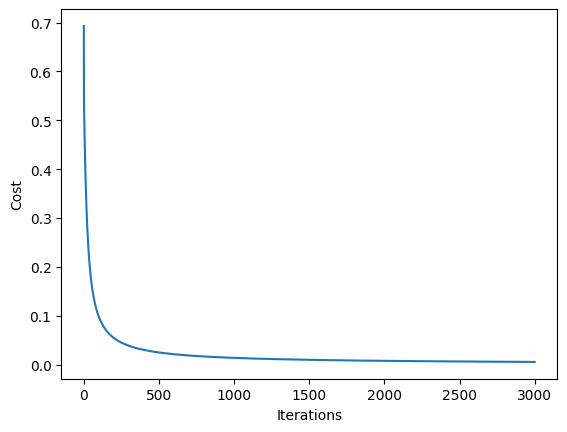

Confusion matrix result: 
[[10.  0.]
 [ 0. 20.]]
accuracy = 100.00%


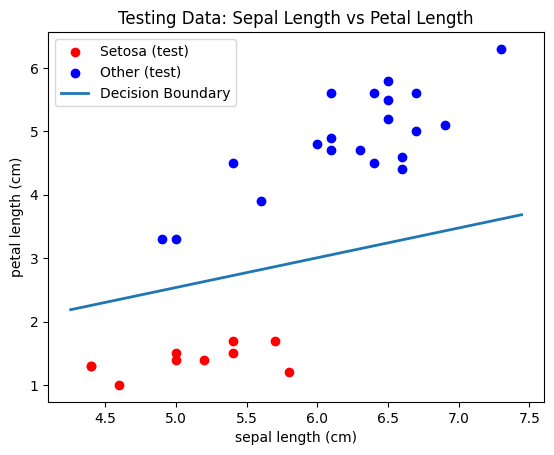

In [201]:
alpha = 0.1
num_iter = 3000
model_weights = fit(alpha, num_iter, X_train,y_train, 100)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

plot_boundary(X_test_setosa, X_test_other, model_weights)

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.16666667 1.25916667 1.3925    ] 	
iteration: 11 	 cost: 0.1419886631564456 	 weights: [-0.62520061 -1.39227376  3.69388986] 	
iteration: 21 	 cost: 0.015092664121383093 	 weights: [-0.70344389 -1.73599029  3.68649223] 	
iteration: 31 	 cost: 0.01380144522168015 	 weights: [-0.72258224 -1.78338587  3.78698596] 	
iteration: 41 	 cost: 0.012731905236529199 	 weights: [-0.73995148 -1.82633571  3.87863671] 	
iteration: 51 	 cost: 0.01183029660963613 	 weights: [-0.75587778 -1.86573379  3.96287464] 	


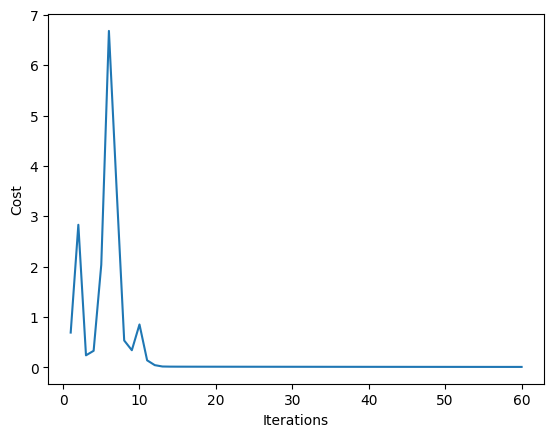

Confusion matrix result: 
[[10.  0.]
 [ 0. 20.]]
accuracy = 100.00%


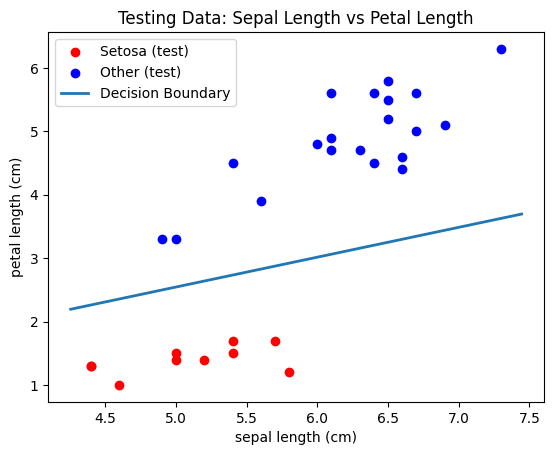

In [206]:
alpha = 1
num_iter = 60
model_weights = fit(alpha, num_iter, X_train,y_train,10)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

plot_boundary(X_test_setosa, X_test_other, model_weights)

iteration: 1 	 cost: 0.6931471805599435 	 weights: [ 16.66666667 125.91666667 139.25      ] 	
iteration: 2 	 cost: 11.512925464970229 	 weights: [-16.66666667 -40.25        90.        ] 	
iteration: 3 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -40.25        90.        ] 	
iteration: 4 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -40.25        90.        ] 	
iteration: 5 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -40.25        90.        ] 	
iteration: 6 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -40.25        90.        ] 	
iteration: 7 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -40.25        90.        ] 	
iteration: 8 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -40.25        90.        ] 	
iteration: 9 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -40.25        90.        ] 	
iteration: 10 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -40.25        90.        ] 	
iteration: 11 	 cos

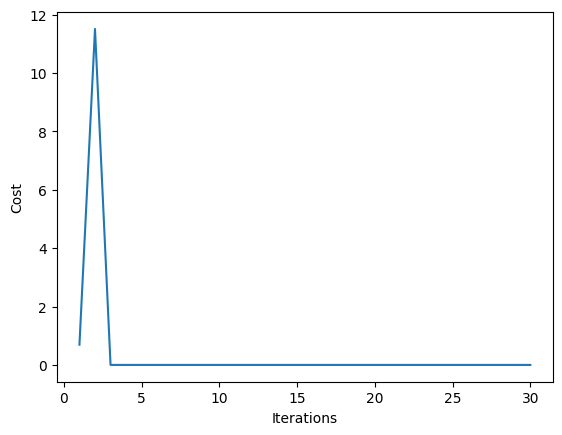

Confusion matrix result: 
[[10.  0.]
 [ 0. 20.]]
accuracy = 100.00%


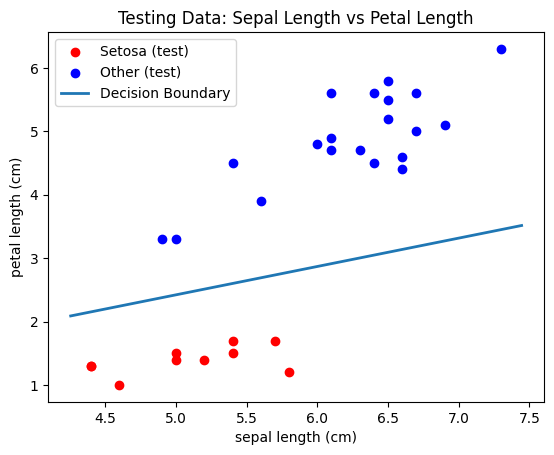

In [211]:
alpha = 100
num_iter = 30
model_weights = fit(alpha, num_iter, X_train,y_train,1)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

plot_boundary(X_test_setosa, X_test_other, model_weights)

The learning rate alpha controls the magnitude of each update during gradient descent. Varying alpha has a significant impact on convergence speed, stability, and final accuracy of the decision boundary.

Given an infinite number of iterations, a very low value of alpha will eventually converge. This is shown with the alpha = 0.0001. It takes very small steps, and the result does not converge even after 3000 iterations, and gives us an accuracy of 66.67%, completely misclassifying all Setosa points.

alpha = 0.01, 0.1 both have smooth, monotonically decreasing cost vs epoch graphs. In general, a greater value of alpha means a faster convergence speed, these values of alpha require only about 1500 iterations to converge, much better than alpha = 0.0001. Both rates achieved high accuracy on the test set and correctly separated Setosa from the other classes. This is the desired region where gradient descent takes sufficiently large steps to make rapid progress, but not so large that it becomes unstable

However alpha = 1, 100 show cost vs epoch graphs that are not monotonically decreasing. They increase and decrease, oscillations, showing that the value overshoots (multiple times with alpha = 1). This could prove problematic if this leads the algorithm to skip the local minima and converge on a different local minima, or even diverge completely, which luckily in this case, it does not. Using alpha = 1, 100 significantly reduces the number of iterations required to converge to around 10.